In [1]:
# load the dataset
import pandas as pd
import numpy as np
import math as mt

pd.set_option('display.max_columns', 32)

df = pd.read_excel('C:/Users/anhai/Desktop/SMU/7331_Data_Mining/Data_Mining_7331/Data/mathdownload2018.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148933 entries, 0 to 148932
Data columns (total 32 columns):
cds                 148933 non-null int64
rtype               148933 non-null object
schoolname          134824 non-null object
districtname        148916 non-null object
countyname          148916 non-null object
charter_flag        15685 non-null object
coe_flag            487 non-null object
dass_flag           7804 non-null object
studentgroup        148933 non-null object
currdenom           148933 non-null int64
currdenom_swd       10205 non-null float64
currstatus          97487 non-null float64
priordenom          148842 non-null float64
priordenom_swd      9952 non-null float64
priorstatus         96934 non-null float64
change              93435 non-null float64
statuslevel         148933 non-null int64
changelevel         148933 non-null int64
color               148933 non-null int64
box                 148933 non-null int64
hscutpoints         25661 non-null object

In [40]:
#parse out state records
dfX = df[df.rtype == "X"]

print(dfX.info())

#remove columns with no data
dfX = dfX.dropna(axis=1, how="all")
dfX.name = "dfX"

print(dfX.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 32 columns):
cds                 17 non-null int64
rtype               17 non-null object
schoolname          0 non-null object
districtname        0 non-null object
countyname          0 non-null object
charter_flag        0 non-null object
coe_flag            0 non-null object
dass_flag           0 non-null object
studentgroup        17 non-null object
currdenom           17 non-null int64
currdenom_swd       1 non-null float64
currstatus          17 non-null float64
priordenom          17 non-null float64
priordenom_swd      1 non-null float64
priorstatus         17 non-null float64
change              17 non-null float64
statuslevel         17 non-null int64
changelevel         17 non-null int64
color               17 non-null int64
box                 17 non-null int64
hscutpoints         0 non-null object
curradjustment      1 non-null float64
prioradjustment     1 non-null float64
pairshare

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
        cds     currdenom  currdenom_swd  currstatus    priordenom  \
count  17.0  1.700000e+01            1.0   17.000000  1.700000e+01   
mean    0.0  7.425339e+05       361212.0  -51.100000  7.474793e+05   
std     0.0  9.059385e+05            NaN   49.352444  9.100511e+05   
min     0.0  1.484900e+04       361212.0 -125.300000  1.538300e+04   
25%     0.0  1.152670e+05       361212.0  -81.000000  1.112850e+05   
50%     0.0  3.966070e+05       361212.0  -65.800000  3.900350e+05   
75%     0.0  9.998850e+05       361212.0  -25.200000  1.020711e+06   
max     0.0  3.166312e+06       361212.0   56.700000  3.195814e+06   


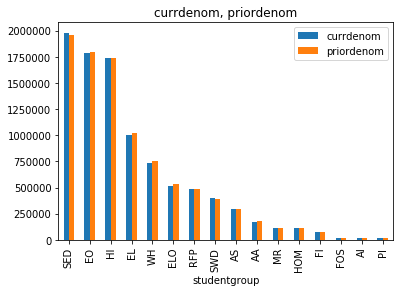

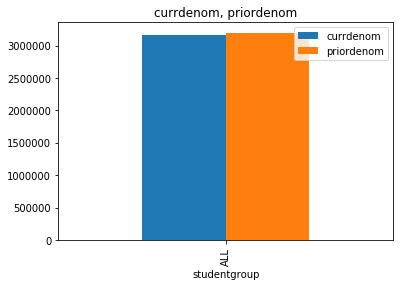

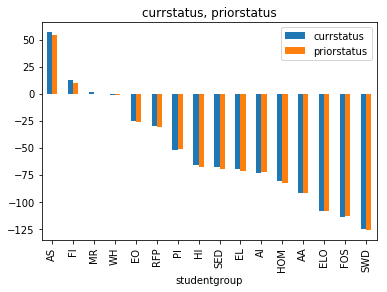

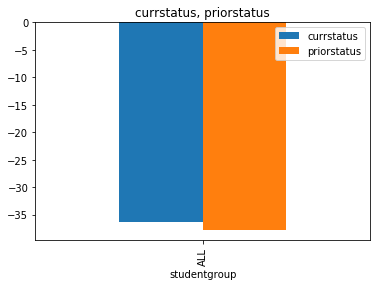

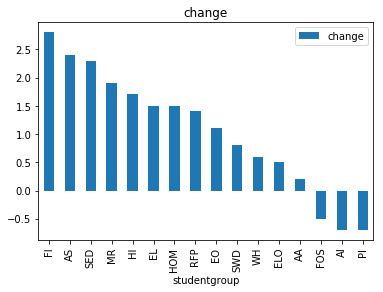

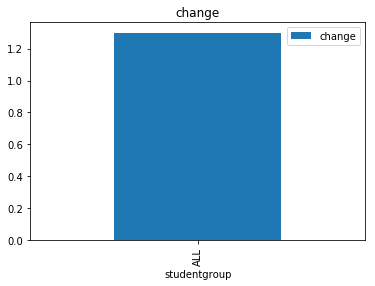

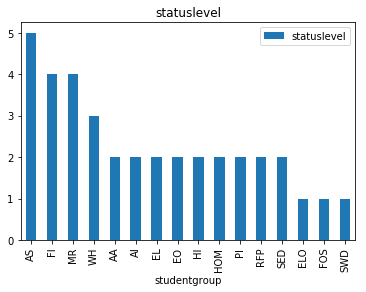

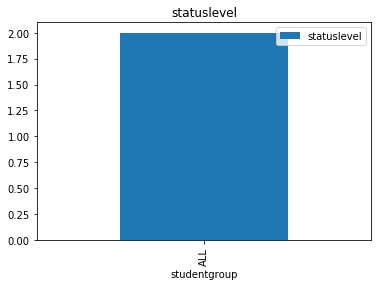

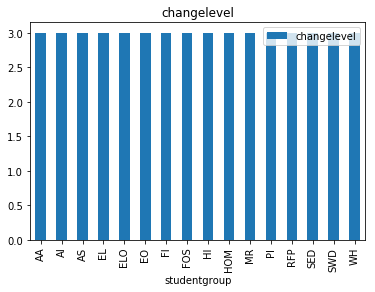

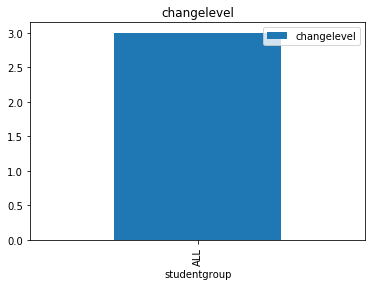

In [49]:
#plot a pie chart of students' achievement levels in math
pct = ["caa_level1_pct", "caa_level2_pct", "caa_level3_pct"]
#print(dfX.loc[2,pct].plot.pie(figsize=(6, 6)))

def barchart(level, col):
    if level.name == "dfX":
        print(level.loc[level.studentgroup != "ALL",col].sort_values(ascending = False, by=col[1])\
        .plot.bar(x=col[0], y=col[1:], title=", ".join(col[1:])))
        print(level.loc[level.studentgroup == "ALL",col]\
        .plot.bar(x=col[0], y=col[1:], title=", ".join(col[1:])))
    elif level.name == "dfCOE" or level.name == "dfD":
        pass
    elif level.name == "dfSChools" or level.name == "dfCharter"\
    or level.name == "dfAlternative" or level.name == "dfAltCharter":
        pass
    
    

#plot number of students that took the assement in the current year and prior year, grouped by student groups
col = ["studentgroup","currdenom","priordenom"]
barchart(dfX, col)

#plot status current year and prior year, grouped by student groups
col = ["studentgroup","currstatus","priorstatus"]
barchart(dfX, col)

#plot status change for each student groups
col = ["studentgroup","change"]
barchart(dfX, col)

#plot status level
col = ["studentgroup","statuslevel"]
barchart(dfX, col)

#plot change level
col = ["studentgroup","changelevel"]
barchart(dfX, col)

print(dfX.describe())



In [42]:
#parse out district records
dfD = df[df.rtype == "D"]

print(dfD.info())

#remove columns with no data
dfD = dfD.dropna(axis=1, how="all")

print(dfD.info())

dfCOE = dfD[dfD.coe_flag == "Y"] 
dfD = dfD[dfD.coe_flag != "Y"] 
dfCOE.name = "dfCOE"
dfD.name = "dfD"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14092 entries, 17 to 148915
Data columns (total 32 columns):
cds                 14092 non-null int64
rtype               14092 non-null object
schoolname          0 non-null object
districtname        14092 non-null object
countyname          14092 non-null object
charter_flag        0 non-null object
coe_flag            487 non-null object
dass_flag           0 non-null object
studentgroup        14092 non-null object
currdenom           14092 non-null int64
currdenom_swd       951 non-null float64
currstatus          10452 non-null float64
priordenom          14092 non-null float64
priordenom_swd      938 non-null float64
priorstatus         10495 non-null float64
change              10210 non-null float64
statuslevel         14092 non-null int64
changelevel         14092 non-null int64
color               14092 non-null int64
box                 14092 non-null int64
hscutpoints         1159 non-null object
curradjustment      1035 n

In [31]:
print(dfCOE.describe())
print(dfD.describe())

print(dfCOE)

                cds   currdenom  currdenom_swd  currstatus  priordenom  \
count  4.870000e+02  487.000000      39.000000  154.000000  487.000000   
mean   3.063698e+13   21.501027       9.923077 -209.950000   22.470226   
std    1.589573e+13   49.281207      12.053356   58.413468   51.734192   
min    1.100170e+12    1.000000       1.000000 -284.900000    0.000000   
25%    1.910199e+13    2.000000       2.000000 -241.725000    2.000000   
50%    3.310330e+13    5.000000       5.000000 -223.050000    6.000000   
75%    4.210421e+13   17.500000      12.000000 -200.400000   19.000000   
max    5.810587e+13  557.000000      46.000000   91.600000  595.000000   

       priordenom_swd  priorstatus      change  statuslevel  changelevel  \
count       36.000000   182.000000  145.000000   487.000000   487.000000   
mean        11.277778  -207.425824    0.133103     0.355236     0.860370   
std         12.912034    56.522768   19.042044     0.607810     1.515696   
min          1.000000  -269.4

In [38]:
#parse out school records
dfS = df[df.rtype == "S"] 

print(dfS.info())

#remove columns with no data
dfS = dfS.dropna(axis=1, how="all")

print(dfS.info())

#parse out charter schools
dfCharter = dfS[dfS.charter_flag == "Y"] 
dfAltCharter = dfCharter[dfCharter.dass_flag == "Y"] #parse out charter alternative schools
dfCharter = dfCharter[dfCharter.dass_flag != "Y"] 
dfCharter.name = "dfCharter"
dfAltCharter.name = "dfAltCharter"

#parse out regular schools
dfSchools = dfS[dfS.charter_flag != "Y"]
dfAlternative = dfSchools[dfSchools.dass_flag == "Y"] #parse out alternative schools
dfSchools = dfSchools[dfSchools.dass_flag != "Y"]
dfSchools.name = "dfSchools"
dfAlternative.name = "dfAlternative"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134824 entries, 30 to 148932
Data columns (total 32 columns):
cds                 134824 non-null int64
rtype               134824 non-null object
schoolname          134824 non-null object
districtname        134824 non-null object
countyname          134824 non-null object
charter_flag        15685 non-null object
coe_flag            0 non-null object
dass_flag           7804 non-null object
studentgroup        134824 non-null object
currdenom           134824 non-null int64
currdenom_swd       9253 non-null float64
currstatus          87018 non-null float64
priordenom          134733 non-null float64
priordenom_swd      9013 non-null float64
priorstatus         86422 non-null float64
change              83208 non-null float64
statuslevel         134824 non-null int64
changelevel         134824 non-null int64
color               134824 non-null int64
box                 134824 non-null int64
hscutpoints         24502 non-null object
c

In [39]:
print(dfSchools.describe())
print(dfCharter.describe())
print(dfAlternative.describe())
print(dfAltCharter.describe())


                cds      currdenom  currdenom_swd    currstatus  \
count  1.125470e+05  112547.000000    7599.000000  75816.000000   
mean   2.941440e+13      95.775978      39.968943    -45.678369   
std    1.381887e+13     153.299752      29.370227     64.199230   
min    1.611190e+12       0.000000       1.000000   -278.300000   
25%    1.964733e+13       6.000000      21.000000    -85.900000   
50%    3.073643e+13      32.000000      33.000000    -46.100000   
75%    3.768412e+13     123.000000      50.000000     -3.000000   
max    5.872770e+13    1927.000000     225.000000    178.900000   

          priordenom  priordenom_swd   priorstatus        change  \
count  112473.000000     7539.000000  75757.000000  73230.000000   
mean       96.824749       39.692400    -47.814821      1.972905   
std       154.414106       28.582714     62.813061     17.941197   
min         0.000000        1.000000   -286.600000   -135.500000   
25%         6.000000       21.000000    -86.900000     -